# Feature Extraction using CNN

Here we are attempting to train a small Convolution Neural Network to see if the neural network can extract features that can help us improve our classical algorithms.

One thing we are concerned about is the fact that classical algorithms cannot perform better tha CNNs. However, we aim to improve classical algorithms because they can run at a much faster speed. So if our CNN feature extractor paired with classical algorithms can perform just as well as original CNNs, it is promising that we can apply this to large datasets that CNN will take too long to run. One other thing is we can run classical algorithms in real time, meaning we can classify music much faster in real time than passing it through a CNN

This file will contain all code to extract features.

In [1]:
import os
import keras
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import librosa
import librosa.display as display

Using TensorFlow backend.


## Data loading

First we will load out date into the notebook so we can process them easily

In [2]:
X = np.load('data_mat/X.npy')
Y = np.load('data_mat/Y.npy')

In [3]:
print "training X shape is {0}".format(X.shape)
print "training Y shape is {0}".format(Y.shape)

training X shape is (1000, 20, 1290)
training Y shape is (1000, 10)


To apply the training set to the model easier, we will transform our data and split them so they can be fed into the models.

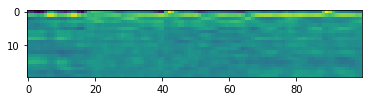

In [4]:
plt.imshow(X[0][:, :100])

training X shape is (1000, 1290, 20)


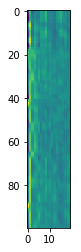

In [3]:
X2 = np.transpose(X, (0, 2, 1))
print "training X shape is {0}".format(X2.shape)
plt.imshow(X2[0][:100, :])

In [4]:
inds = np.arange(X2.shape[0])
np.random.shuffle(inds)
X_train, X_test, Y_train, Y_test = ms.train_test_split(X2[inds], Y[inds], test_size=0.3, random_state=43)
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(700, 1290, 20) (300, 1290, 20) (700, 10) (300, 10)


## CNN modeling

Here we will use a 1D convolution layer, followed by standard pool, relu layers, followed by dense layers and then a softmax unit for output prediction.

In [55]:
def model(input_shape):
    X_inputs = keras.layers.Input(input_shape)
    X = X_inputs
    print(X.shape)
    X = keras.layers.Conv1D(filters=5, kernel_size=100, padding='same', data_format="channels_last")(X)
    print(X.shape)
    X = keras.layers.Dropout(0.3)(X)    
    X = keras.layers.MaxPooling1D(pool_size=2)(X)
    X = keras.layers.BatchNormalization(axis = 2, name = 'bn0')(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.Conv1D(filters=50, kernel_size=10, padding='same', data_format="channels_last")(X)
    X = keras.layers.Dropout(0.3)(X)    
    X = keras.layers.MaxPooling1D(pool_size=2)(X)
    X = keras.layers.BatchNormalization(axis = 2, name = 'bn1')(X)
    X = keras.layers.Activation('relu')(X)
    print(X.shape)
    
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(50, activation='sigmoid')(X)
    X = keras.layers.Dropout(0.5)(X)    
#     X = keras.layers.Dense(35, activation='sigmoid')(X)
    X = keras.layers.Dense(20, activation='sigmoid')(X)
    X = keras.layers.Dropout(0.5)(X)    
    X = keras.layers.Dense(10, activation='sigmoid')(X)
    X = keras.layers.Dense(10, activation='softmax')(X)
    print(X.shape)
    
    model = keras.models.Model(inputs=X_inputs, outputs=X, name='cnn')
    return model

In [60]:
m = model(X2.shape[1:])
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.001)
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

(?, 1290, 20)
(?, 1290, 5)
(?, 322, 50)
(?, 10)


In [61]:
m.fit(X_train, Y_train, epochs=100)

Epoch 1/100
700/700 [==============================] - 7s 11ms/step - loss: 2.3411 - categorical_accuracy: 0.1171
Epoch 2/100
700/700 [==============================] - 5s 7ms/step - loss: 2.3218 - categorical_accuracy: 0.1143
Epoch 3/100
700/700 [==============================] - 5s 8ms/step - loss: 2.2971 - categorical_accuracy: 0.1357
Epoch 4/100
700/700 [==============================] - 5s 7ms/step - loss: 2.2801 - categorical_accuracy: 0.1443
Epoch 5/100
700/700 [==============================] - 5s 8ms/step - loss: 2.2675 - categorical_accuracy: 0.1600
Epoch 6/100
700/700 [==============================] - 5s 7ms/step - loss: 2.2519 - categorical_accuracy: 0.1671
Epoch 7/100
700/700 [==============================] - 5s 8ms/step - loss: 2.2256 - categorical_accuracy: 0.2229
Epoch 8/100
700/700 [==============================] - 5s 8ms/step - loss: 2.2205 - categorical_accuracy: 0.1871
Epoch 9/100
700/700 [==============================] - 5s 7ms/step - loss: 2.2074 - categorical

KeyboardInterrupt: 

In [ ]:
preds = m.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))